일별시세 페이지 분석

In [4]:
index_cd = 'KPI200'
page_n = 1
naver_index = 'http://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(page_n)

In [5]:
from urllib.request import urlopen
source = urlopen(naver_index).read()
source

b'<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>\xb3\xd7\xc0\xcc\xb9\xf6 \xb1\xdd\xc0\xb6</title>\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20220407160311/css/newstock.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20220407160311/css/common.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20220407160311/css/layout.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20220407160311/css/main.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20220407160311/css/newstock2.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20220407160311/css/newstock3.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20220407160311/css/wor

In [6]:
import bs4
source = bs4.BeautifulSoup(source, 'lxml')
source

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>네이버 금융</title>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20220407160311/css/newstock.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20220407160311/css/common.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20220407160311/css/layout.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20220407160311/css/main.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20220407160311/css/newstock2.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20220407160311/css/newstock3.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20220407160311/css/world.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<script src="https

In [7]:
print(source.prettify())

<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   네이버 금융
  </title>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20220407160311/css/newstock.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20220407160311/css/common.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20220407160311/css/layout.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20220407160311/css/main.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20220407160311/css/newstock2.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20220407160311/css/newstock3.css" rel="stylesheet" type="text/css"/>
  <link href="https://ssl.pstatic.net/imgstock/static.pc/20220407160311/css/world.css" rel="stylesheet" type="text/css"/>
 </head

In [8]:
td = source.find_all('td')
len(td)

54

날짜 추출

In [9]:
# /html/body/div/table[1]/tbody/tr[3]/td[1]
source.find_all('table')[0].find_all('tr')[2].find_all('td')[0]

<td class="date">2022.04.08</td>

In [10]:
d = source.find_all('td', class_='date')[0].text
d

'2022.04.08'

In [11]:
import datetime as dt

In [12]:
yyyy = int(d.split('.')[0]) 
mm = int(d.split('.')[1])
dd = int(d.split('.')[2])

this_date= dt.date(yyyy, mm, dd)
this_date

datetime.date(2022, 4, 8)

날짜정보를  date 타입으로 변경하는 함수 정의

In [13]:
def date_format(d):
    d = str(d).replace('-', '.')
    
    yyyy = int(d.split('.')[0]) 
    mm = int(d.split('.')[1])
    dd = int(d.split('.')[2])

    this_date= dt.date(yyyy, mm, dd)
    return this_date

종가 추출

In [14]:
# /html/body/div/table[1]/tbody/tr[3]/td[2]
this_close = source.find_all('table')[0].find_all('tr')[2].find_all('td')[1].text
this_close

'356.01'

In [15]:
this_close = this_close.replace(',', '') # 쉼표(,) 제거 
this_close = float(this_close)
this_close

356.01

In [16]:
p = source.find_all('td', class_='number_1')[0].text
p

'356.01'

페이지 상의 날짜와 종가정보 전체 추출

In [17]:
dates = source.find_all('td', class_='date')
prices = source.find_all('td', class_='number_1')

In [18]:
len(dates)

6

In [19]:
len(prices)

24

In [20]:
for n in range(len(dates)):
    dates[n].text

In [21]:
for n in range(len(dates)): # dates 개수만큼 반복   0~5
    this_date = dates[n].text # n번째 dates 값 추출
    this_date = date_format(this_date) # 날짜 형식으로 변환
    
    this_close = prices[n*4].text 
    # 0, 4, 8, ... 4의 배수로 돌아가는 가격 추출
    this_close = this_close.replace(',', '') # 쉼표(,) 제거
    this_close = float(this_close) # 숫자 형식으로 변환
    this_close
    
    print(this_date, this_close)

2022-04-08 356.01
2022-04-07 355.73
2022-04-06 361.01
2022-04-05 364.74
2022-04-04 364.94
2022-04-01 363.19


마지막 페이지 번호 찾기

In [22]:
# /html/body/div/table[2]/tbody/tr/td[7]/a

# <a href="/sise/sise_index_day.naver?code=KPI200&amp;page=662">662</a> 

In [23]:
paging = source.find('td', class_='pgRR').find('a')['href']
paging

'/sise/sise_index_day.nhn?code=KPI200&page=670'

In [24]:
paging.split('&')

['/sise/sise_index_day.nhn?code=KPI200', 'page=670']

In [25]:
paging = paging.split('&')[1]
paging

'page=670'

In [26]:
paging = paging.split('=')[1]
paging

'670'

In [27]:
last_page = source.find('td', class_='pgRR').find('a')['href']
last_page = last_page.split('&')[1]
last_page = last_page.split('=')[1]
last_page = int(last_page) # 페이지 번호를 숫자 형식 (정수)으로 변환

In [28]:
# dates[n].text.split('.')[0].isdigit()

dates[0].text.split('.')[0].isdigit()

True

In [29]:
print(dates[0])
print(dates[0].text)
print(dates[0].text.split('.'))
print(dates[0].text.split('.')[0])
print(dates[0].text.split('.')[0].isdigit())

<td class="date">2022.04.08</td>
2022.04.08
['2022', '04', '08']
2022
True


네이버에서 일자별 인덱스를 추출하는 함수 정의

In [30]:
def historical_index_naver(index_cd, start_date='', end_date='', page_n=1, last_page=0):
    
    if start_date:   # start_date가 있으면
        start_date = date_format(start_date)   # date 포맷으로 변환
    else:    # 없으면
        start_date = dt.date.today()   # 오늘 날짜를 지정
    if end_date:   
        end_date = date_format(end_date)   
    else:   
        end_date = dt.date.today()  
        
        
    naver_index = 'http://finance.naver.com/sise/sise_index_day.nhn?code=' + index_cd + '&page=' + str(page_n)
    
    source = urlopen(naver_index).read()   # 지정한 페이지에서 코드 읽기
    source = bs4.BeautifulSoup(source, 'lxml')   # 뷰티풀 스프로 태그별로 코드 분류
    
    dates = source.find_all('td', class_='date')   # <td class="date">태그에서 날짜 수집   
    prices = source.find_all('td', class_='number_1')   # <td class="number_1">태그에서 지수 수집
    
    for n in range(len(dates)):
    
        if dates[n].text.split('.')[0].isdigit():
            
            # 날짜 처리
            this_date = dates[n].text
            this_date= date_format(this_date)
            
            if this_date <= end_date and this_date >= start_date:   # start<=this<=end
            # start_date와 end_date 사이에서 데이터 저장
                # 종가 처리
                this_close = prices[n*4].text   # prices 중 종가지수인 0,4,8,...번째 데이터 추출
                this_close = this_close.replace(',', '')
                this_close = float(this_close)

                # 딕셔너리에 저장
                historical_prices[this_date] = this_close
                
            elif this_date < start_date:
            # start_date 이전이면 함수 종료
                return historical_prices              
            
    # 페이지 네비게이션
    if last_page == 0:
        last_page = source.find('td', class_='pgRR').find('a')['href']
        # 마지막페이지 주소 추출
        last_page = last_page.split('&')[1]   # & 뒤의 page=506 부분 추출
        last_page = last_page.split('=')[1]   # = 뒤의 페이지번호만 추출
        last_page = int(last_page)   # 숫자형 변수로 변환
        
    # 다음 페이지 호출
    if page_n < last_page:   # 3페이지 < 670페이지
        page_n = page_n + 1 
        historical_index_naver(index_cd, start_date, end_date, page_n, last_page)   
        
    return historical_prices  

In [31]:
index_cd = 'KPI200'
historical_prices = dict()
historical_index_naver(index_cd, '2021-1-1', '2021-12-31')
historical_prices

{datetime.date(2021, 12, 30): 394.19,
 datetime.date(2021, 12, 29): 396.72,
 datetime.date(2021, 12, 28): 401.21,
 datetime.date(2021, 12, 27): 398.61,
 datetime.date(2021, 12, 24): 400.53,
 datetime.date(2021, 12, 23): 398.15,
 datetime.date(2021, 12, 22): 396.07,
 datetime.date(2021, 12, 21): 393.95,
 datetime.date(2021, 12, 20): 391.37,
 datetime.date(2021, 12, 17): 398.96,
 datetime.date(2021, 12, 16): 397.68,
 datetime.date(2021, 12, 15): 395.66,
 datetime.date(2021, 12, 14): 395.41,
 datetime.date(2021, 12, 13): 397.27,
 datetime.date(2021, 12, 10): 397.97,
 datetime.date(2021, 12, 9): 401.13,
 datetime.date(2021, 12, 8): 397.27,
 datetime.date(2021, 12, 7): 396.31,
 datetime.date(2021, 12, 6): 392.85,
 datetime.date(2021, 12, 3): 391.96,
 datetime.date(2021, 12, 2): 389.64,
 datetime.date(2021, 12, 1): 383.13,
 datetime.date(2021, 11, 30): 373.24,
 datetime.date(2021, 11, 29): 381.63,
 datetime.date(2021, 11, 26): 385.07,
 datetime.date(2021, 11, 25): 391.93,
 datetime.date(2021

In [32]:
import pandas as pd

In [33]:
kospi200 = historical_prices
k200 = pd.DataFrame({'K200' : kospi200})
k200.head(3)

,K200
2021-01-04,399.88
2021-01-05,406.03
2021-01-06,402.08


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

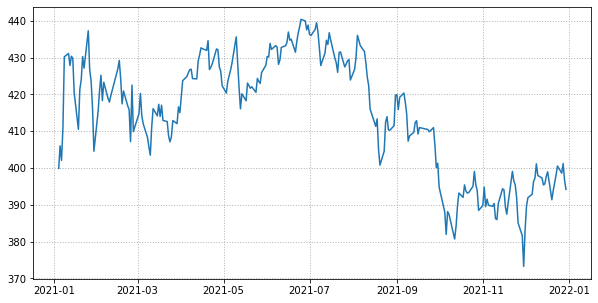

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k200['K200'])
plt.grid(True, color='0.7', linestyle=':', linewidth=1)

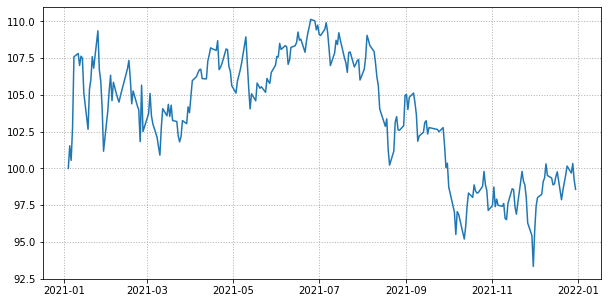

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k200['K200']/k200['K200'][0]*100)
plt.grid(True, color='0.7', linestyle=':', linewidth=1)